# Exploratory Data Analysis and Visualization using threads

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import _thread
import threading 

In [4]:
df = pd.read_csv(r"creditcard.csv", dtype='unicode')

In [5]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.3598071336738,-0.0727811733098497,2.53634673796914,1.37815522427443,-0.338320769942518,0.462387777762292,0.239598554061257,0.0986979012610507,0.363786969611213,...,-0.018306777944153,0.277837575558899,-0.110473910188767,0.0669280749146731,0.128539358273528,-0.189114843888824,0.133558376740387,-0.0210530534538215,149.62,0
1,0,1.19185711131486,0.26615071205963,0.16648011335321,0.448154078460911,0.0600176492822243,-0.0823608088155687,-0.0788029833323113,0.0851016549148104,-0.255425128109186,...,-0.225775248033138,-0.638671952771851,0.101288021253234,-0.339846475529127,0.167170404418143,0.125894532368176,-0.00898309914322813,0.0147241691924927,2.69,0
2,1,-1.35835406159823,-1.34016307473609,1.77320934263119,0.379779593034328,-0.503198133318193,1.80049938079263,0.791460956450422,0.247675786588991,-1.51465432260583,...,0.247998153469754,0.771679401917229,0.909412262347719,-0.689280956490685,-0.327641833735251,-0.139096571514147,-0.0553527940384261,-0.0597518405929204,378.66,0
3,1,-0.966271711572087,-0.185226008082898,1.79299333957872,-0.863291275036453,-0.0103088796030823,1.24720316752486,0.23760893977178,0.377435874652262,-1.38702406270197,...,-0.108300452035545,0.00527359678253453,-0.190320518742841,-1.17557533186321,0.647376034602038,-0.221928844458407,0.0627228487293033,0.0614576285006353,123.5,0
4,2,-1.15823309349523,0.877736754848451,1.548717846511,0.403033933955121,-0.407193377311653,0.0959214624684256,0.592940745385545,-0.270532677192282,0.817739308235294,...,-0.00943069713232919,0.79827849458971,-0.137458079619063,0.141266983824769,-0.206009587619756,0.502292224181569,0.219422229513348,0.215153147499206,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786,-11.8811178854323,10.0717849710003,-9.83478345739033,-2.06665568459413,-5.36447278097585,-2.6068373309456,-4.91821543115252,7.305334020798,1.9144282734458,...,0.213454108437359,0.111863735978609,1.01447989719391,-0.509348453168509,1.4368069070214,0.250034279569581,0.943651171507532,0.823730961486502,0.77,0
284803,172787,-0.732788670658956,-0.0550804899173326,2.03502974528243,-0.73858858438744,0.868229398914682,1.05841527222565,0.0243296959175797,0.294868698501783,0.584800017281683,...,0.214205341747019,0.924383584903381,0.0124630383316793,-1.01622566867336,-0.606623985854728,-0.395255065710324,0.0684724700405593,-0.0535273892010011,24.79,0
284804,172788,1.91956500980048,-0.301253845990644,-3.24963981406834,-0.55782812475002,2.63051512011547,3.03126009781428,-0.296826527116156,0.708417184967134,0.432454047632915,...,0.232045035925397,0.57822900992263,-0.0375008550221367,0.640133881346421,0.265745453243744,-0.0873705959041059,0.00445477213829229,-0.0265608285615222,67.88,0
284805,172788,-0.240440049680947,0.530482513118839,0.702510230095103,0.689799168040973,-0.377961134444982,0.62370772214768,-0.68617998628885,0.679145459790659,0.392086712465972,...,0.265244916386865,0.800048741498139,-0.163297944406659,0.123205243742508,-0.569158864158597,0.546668462188323,0.108820734744839,0.104532821478796,10,0


In [6]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

<AxesSubplot:title={'center':'Count (Class)'}>

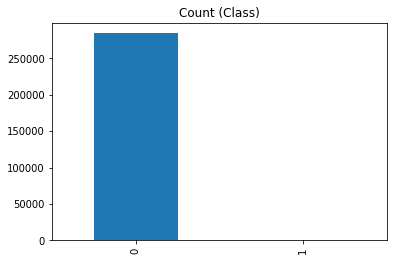

In [7]:
df.Class.value_counts().plot(kind='bar', title='Count (Class)')

# UnderSampling

492
0    492
1    492
Name: Class, dtype: int64


<AxesSubplot:title={'center':'Count (Class)'}>

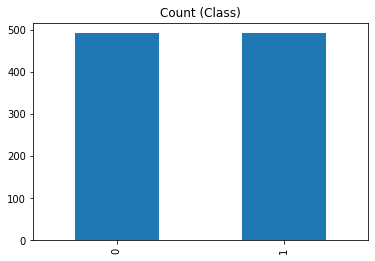

In [8]:
class_count = df.Class.value_counts()
min_class = min(class_count)
print(min_class)

# Divide DataFrame by class
df_class_0 = df[df['Class'] == '0']
df_class_1 = df[df['Class'] == '1']

#Undersampling
df_class_0_under = df_class_0.sample(min_class)

df_us = pd.concat([df_class_0_under,df_class_1], axis = 0)
print(df_us.Class.value_counts())
df_us.Class.value_counts().plot(kind='bar', title='Count (Class)')

# Oversampling

284315
0    284315
1    284315
Name: Class, dtype: int64


<AxesSubplot:title={'center':'Count (Class)'}>

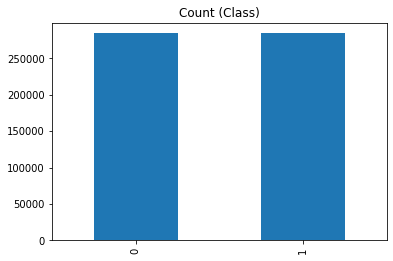

In [9]:
class_count = df.Class.value_counts()
max_class = max(class_count)
print(max_class)

# Divide DataFrame by class
df_class_0 = df[df['Class'] == '0']
df_class_1 = df[df['Class'] == '1']

# Oversampling
df_class_1_over = df_class_1.sample(max_class,replace = True)

df_os = pd.concat([df_class_0,df_class_1_over], axis = 0)
print(df_os.Class.value_counts())
df_os.Class.value_counts().plot(kind='bar', title='Count (Class)')